In [23]:
import torch.nn as nn
import torch

In [24]:
A = torch.tensor([1,2,3])

In [25]:
embedding = nn.Embedding(10, 3)

In [26]:
embedding(A)

tensor([[-0.1441, -2.6497, -0.0610],
        [ 1.4158, -1.1405, -0.8985],
        [-0.5867, -0.5864, -0.7786]], grad_fn=<EmbeddingBackward>)

In [35]:
pretrained_embeddings = torch.tensor([[0.1*i for k in range(3)] for i in range(10)])

In [36]:
pretrained_embeddings

tensor([[0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000],
        [0.3000, 0.3000, 0.3000],
        [0.4000, 0.4000, 0.4000],
        [0.5000, 0.5000, 0.5000],
        [0.6000, 0.6000, 0.6000],
        [0.7000, 0.7000, 0.7000],
        [0.8000, 0.8000, 0.8000],
        [0.9000, 0.9000, 0.9000]])

In [34]:
_ = embedding.weight.data.copy_(pretrained_embeddings)

RuntimeError: The expanded size of the tensor (10) must match the existing size (20) at non-singleton dimension 0.  Target sizes: [10, 3].  Tensor sizes: [20, 3]

In [30]:
embedding(A)

tensor([[0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000],
        [0.3000, 0.3000, 0.3000]], grad_fn=<EmbeddingBackward>)

In [38]:
class Model(nn.Module):
    def __init__(self, vocabulary_size,input_dim_audio, embedding_dim, output_dim):
        super(Model, self).__init__()
        self.vocabulary_size = vocabulary_size
        self.input_dim_audio = input_dim_audio
        self.embedding_dim = embedding_dim
        self.output_dim = output_dim

        self.embedding = nn.Embedding(vocabulary_size, embedding_dim)


    def forward(self, data):
        text = data[0]
        audio = data[1]

        embedded = self.embedding(text)
        return embedded

In [39]:
mod = Model(100,20,300,10)

In [40]:
input = torch.randn(20, 16, 50)

In [3]:
import baseline.utils as utils
import baseline.batcher as batcher

In [4]:
folders,data_folders = utils.folders_info()
vocabulary,data_dict,labels_dict,frames_dict = utils.init_dictionaries(folders,data_folders)

loaders = batcher.initialize_tensors(folders,data_folders,vocabulary,data_dict,labels_dict,frames_dict,100)

In [6]:
train_loader = loaders[0]

In [7]:
labels = []
for batch,(audio,text,label) in enumerate(train_loader):
    labels.append(label)

In [10]:
import torch

In [14]:
A = torch.stack(labels)

In [21]:
X = A.reshape(747*100)

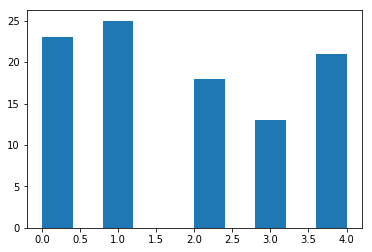

In [13]:
import numpy as np
import matplotlib.pyplot as plt
a,b,c = plt.hist([2, 2, 3, 3, 0, 3, 2, 1, 3, 1, 2, 4, 1, 3, 0, 2, 3, 0, 3, 3, 4, 0, 3, 1,
        0, 4, 0, 1, 4, 3, 2, 1, 4, 0, 0, 0, 0, 4, 3, 1, 0, 4, 4, 2, 1, 0, 0, 1,
        1, 3, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 4, 4, 4, 3, 4, 0, 1, 1, 0,
        4, 1, 4, 1, 2, 0, 0, 1, 2, 4, 0, 1, 4, 2, 4, 2, 1, 2, 4, 4, 0, 1, 2, 2,
        0, 1, 4, 4])

In [12]:
plt.show()

In [24]:
[ 2940., 10557.,5361.,  5618.,50224.]

[2940.0, 10557.0, 5361.0, 5618.0, 50224.0]

In [3]:
import baseline.utils as utils
import baseline.batcher as batcher
import torch.utils.data

In [4]:
folders,data_folders = utils.folders_info()

batch_size = 100
datasets = batcher.initialize_datasets(folders,data_folders)

In [10]:
datasets[0].__getitem__(0)[2]

tensor(2)

In [14]:
folders

['train', 'dev', 'test']

In [16]:
import json

In [17]:
vocabulary = {'aa':1,'cc':2}

In [18]:
with open('vocabulary.json','w') as file:
    file.write(json.dumps(vocabulary))

In [19]:
with open('vocabulary.json','r') as file:
    vocabulary_2 = json.loads(file.read())

In [21]:
vocabulary_2['aa']

1

In [22]:
vocabulary.keys()

dict_keys(['aa', 'cc'])

In [24]:
A = 1
if A:
    print('ha')

ha


In [25]:
A = torch.zeros((200,300))

In [27]:
A.shape[0]

200

In [31]:
None 

AttributeError: 'NoneType' object has no attribute 'isTensor'

In [34]:
vocabulary['aa']

1